In [1]:
import spc
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
f = spc.File('../data/20180701_074127_1151_0_104.spc')

x-y(1)


In [4]:
data = f.data_txt(delimiter=';', newline='\n')

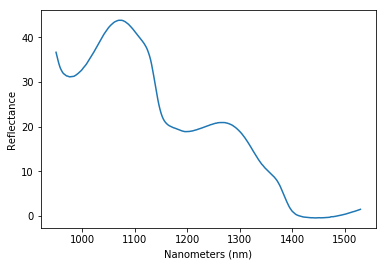

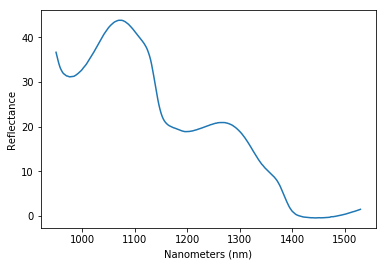

In [5]:
f.plot()

In [6]:
import sys
sys.version_info[0]

from io import StringIO

In [7]:
import sys
if sys.version_info[0] < 3:
    
    from StringIO import StringIO
else:
    from io import StringIO

#import pandas as pd

In [8]:
spectra = StringIO(data)
df = pd.read_csv(spectra, sep=";", header=None, dtype={0:'int32', 1:'float64'})
df.set_index(0, inplace=True)
df.T.tail()

,950,952,954,956,958,960,962,964,966,968,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
1,36.667355,35.703888,34.738171,33.886429,33.181637,32.685051,32.258488,31.924465,31.732567,31.527422,...,0.80386,0.905122,0.986107,1.032288,1.108069,1.189389,1.267692,1.351587,1.433138,1.518896


# Database creation

In [9]:
import os

In [10]:
datafolder = '../data'

In [11]:
filelist = [x for x in os.listdir(datafolder) if x.endswith('.spc')]
filelist.sort()

In [12]:
filelist[:5]

['20180619_074624_1151_0_1.spc',
 '20180619_074802_1151_0_2.spc',
 '20180619_074931_1151_0_3.spc',
 '20180619_075036_1151_0_4.spc',
 '20180619_075219_1151_0_5.spc']

In [13]:
targets = pd.read_excel(os.path.join(datafolder, 'PeaRefs.xlsx'))
targets.head()

,Spectra,Average
0,1,94.333333
1,2,94.333333
2,3,94.333333
3,4,94.333333
4,5,76.333333


In [14]:
targets.shape

(374, 2)

In [15]:
len(filelist)

374

## Columns definition

In [16]:
columns = []
columns.extend(['time'])
columns.extend(['customerID', 'customer'])
columns.extend(['temperature',])
columns.extend(['long', 'lat'])
columns.extend(['vegetable', 'sampleID'])
columns.extend([int(x) for x in range(950, 1530+1, 2)])
columns.append('target')
#columns

In [17]:
dataset = pd.DataFrame(columns=columns)
sampleid = 0

for index, file in enumerate(filelist[:]):
    details = {}
    
    # Target
    details['target'] = targets.Average.iloc[index]
    
    # sample ID
    if sampleid == 0 and index ==0:
        sampleid = 0
    if index != 0 and details['target'] != targets['Average'].iloc[index-1]:
        sampleid += 1
    else:
        pass #same subsample
    
    details['sampleID'] = sampleid
    
    # Timestamp
    timestamp = '-'.join(file.split('_')[:2])
    time = pd.to_datetime(timestamp, format='%Y%m%d-%H%M%S')
    details['time'] = time
    
    # Spectra
    f = spc.File(os.path.join(datafolder, file))
    data = f.data_txt(delimiter=';', newline='\n')
    spectra = StringIO(data)
    df = pd.read_csv(spectra, sep=";", header=None, dtype={0:'int', 1:'float64'})
    df.set_index(0, inplace=True)
    df = df.T
    
    #Additionnal data
    misc = pd.DataFrame(details, index=[1])
    
    df = pd.concat([df, misc], axis =1)
    
    dataset = dataset.append(df, ignore_index=True)
    #dataset.loc[name] = [details.get(x, np.nan) for x in dataset.columns]

dataset.head()

x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)

,customer,customerID,lat,long,sampleID,temperature,time,vegetable,950,952,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,target
0,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:46:24,NaN,36.723839,35.745964,...,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571,94.333333
1,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:48:02,NaN,36.369366,35.383987,...,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826,94.333333
2,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:49:31,NaN,35.385422,34.405182,...,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850,94.333333
3,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:50:36,NaN,35.121685,34.145687,...,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516,94.333333
4,NaN,NaN,NaN,NaN,1,NaN,2018-06-19 07:52:19,NaN,36.185947,35.209904,...,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842,76.333333


In [131]:
dataset.head()

,customer,customerID,lat,long,sampleID,temperature,time,vegetable,950,952,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,target
0,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:46:24,NaN,36.723839,35.745964,...,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571,94.333333
1,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:48:02,NaN,36.369366,35.383987,...,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826,94.333333
2,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:49:31,NaN,35.385422,34.405182,...,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850,94.333333
3,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:50:36,NaN,35.121685,34.145687,...,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516,94.333333
4,NaN,NaN,NaN,NaN,1,NaN,2018-06-19 07:52:19,NaN,36.185947,35.209904,...,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842,76.333333


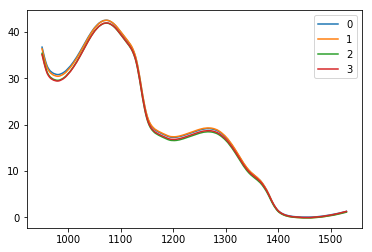

In [27]:
dataset[[int(x) for x in range(950, 1530+1, 2)]].T[list(range(4))].plot()

In [30]:
df = dataset[['target', 'sampleID']].groupby('sampleID').std()
df#[df['target'] != 0]#.shape

,target
sampleID,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,NaN
7,0.0
8,0.0


In [31]:
from sqlalchemy import create_engine
#engine = create_engine('sqlite:///:memory:')
engine = create_engine('sqlite:////Users/cricket/Documents/peas project/open-peas/data/spectraset.db')

In [32]:
dataset.to_sql('dataset.db', engine)

In [33]:
dataset.to_csv('dataset.csv')

In [21]:
targets['Average'].iloc[-1]

82.66666666666667